In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn

In [99]:
dataset = load_breast_cancer()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalise data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

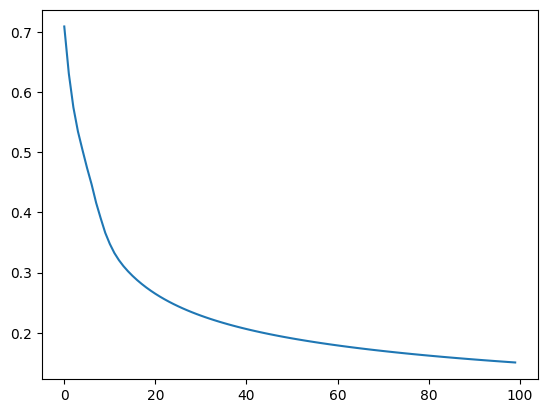

In [169]:
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features: int):
        super().__init__()
        self.linear = nn.Linear(n_input_features, 1 )

    def forward(self, x):
        x = self.linear(x)
        return torch.sigmoid(x)


model = LogisticRegression(X_train.shape[1])

learning_rate = 3
criterion = nn.BCELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_epochs = 100

losses = []

for epoch in range(n_epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    losses.append(loss.item())

plt.plot(np.arange(n_epochs), losses)

In [186]:
def calculate_accuracy_from_threshold(threshold):
    with torch.no_grad():
        y_pred = model(X_test)
    y_pred_binary = y_pred[:]
    y_pred_binary[y_pred_binary < threshold] = 0
    y_pred_binary[y_pred_binary >= threshold] = 1
    return (y_pred_binary == y_test).sum() / len(y_test)

thresholds, accuracies = [], []

# Model accuracy by threshold
for i in np.arange(0, 1, 0.01):
    thresholds.append(i)
    accuracies.append(calculate_accuracy_from_threshold(i))

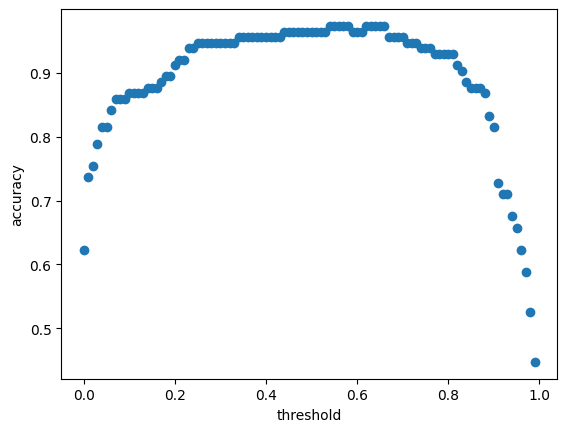

In [188]:
plt.scatter(thresholds, accuracies)
plt.xlabel("threshold")
plt.ylabel("accuracy")
plt.show()